In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from math import factorial
from scipy.optimize import fsolve
import scipy.optimize as opt
import warnings
# warnings.filterwarnings("ignore")

In [12]:
def Eq(x): 
    return -50/80 + (1 + 0.273/(1+2.42/x**1.5)**(2/3))*np.exp(-(np.pi/2/(1+2.62/x**1.07)**0.468)**2*0.03375/x)

z = fsolve(Eq, 10)
print(type(fsolve))

In [14]:
x = 0
y = -50/80 + (1 + 0.273/(1+2.42/x**1.5)**(2/3))*np.exp(-(np.pi/2/(1+2.62/x**1.07)**0.468)**2*0.03375/x)
print(y)

# Q1
- v(r) = sin(r) + r^2 + 1  

### (a) find the expressions for derivatives

In [2]:
r = np.linspace(-np.pi, np.pi, 100000) # set r from -pi to pi

v = np.sin(r) + r**2 + 1
first = np.cos(r) + 2*r
second = -np.sin(r) + 2
third = -np.cos(r)

### (b) Plot v(r)

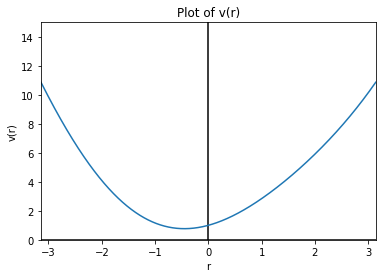

In [3]:
plt.figure
plt.title("Plot of v(r)")
plt.xlabel("r");plt.ylabel("v(r)")
plt.xlim(-np.pi, np.pi);plt.ylim(0,15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.plot(r,v)

### (c) Through visual inspection, determine the value of r for which v is minimum

In visual inspection, r is about -0.45


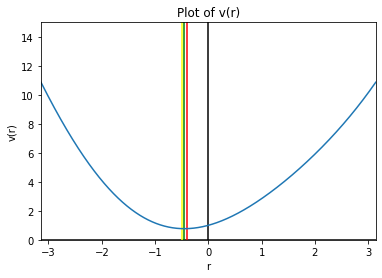

In [4]:
plt.figure
plt.title("Plot of v(r)")
plt.xlabel("r");plt.ylabel("v(r)")
plt.xlim(-np.pi, np.pi);plt.ylim(0,15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.axvline(-0.4, color='red')
plt.axvline(-0.45, color='green')
plt.axvline(-0.5, color='yellow') # try to check in visual inspection

plt.plot(r,v)
print("In visual inspection, r is about -0.45")

### (d) Plot the first derivative, at what value is it 0

Visual Inspection : r = -0.45
A little more accurate answer through code : r = -0.45019472920670944
Using Newton-Raphson(Most Accurate) : r = -0.45018361129487355


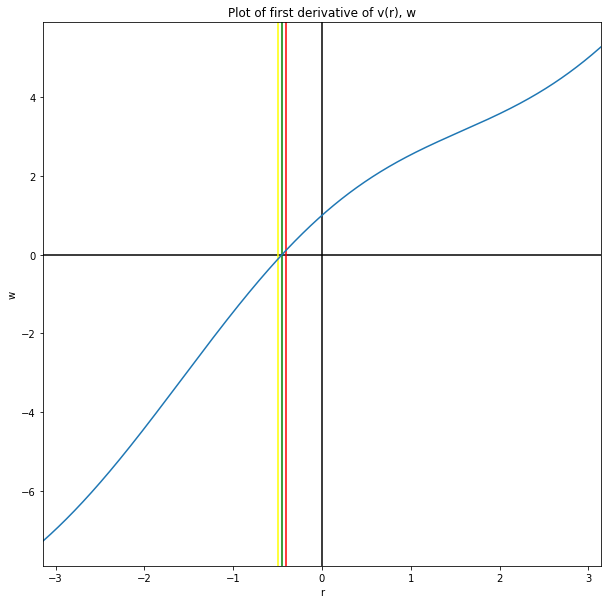

In [5]:
plt.figure(figsize = (10,10))
plt.title("Plot of first derivative of v(r), w")
plt.xlabel("r");plt.ylabel("w")
plt.xlim(-np.pi, np.pi)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.axvline(-0.4, color='red')
plt.axvline(-0.45, color='green')
plt.axvline(-0.5, color='yellow') # try to check in visual inspection

plt.plot(r,first)

# use repetition to find the index in which w changes from negative to positive
for i in range(len(first)): 
    if first[i] < 0 and first[i+1] >= 0:
        index = i
        
print("Visual Inspection : r = -0.45")
# the actual zero will be somewhere between index and index+1. Print the average of those two.
print("A little more accurate answer through code : r = {}".format((r[index]+r[index+1])/2))


def oneEquation(z): 
    x = z[0] 
    F = np.empty((1)) 
    F[0] = np.cos(x) + 2*x 
    return F

zGuess = np.array([-1])
z = fsolve(oneEquation, zGuess)

print("Using Newton-Raphson(Most Accurate) : r = {}". format(z[0]))

In [6]:
# Additional jobs, check second derivative to see if the value of r at the point where w = 0 is minima or maxima
print("The value of second derivative at w = 0 :", second[index])

The value of second derivative at w = 0 : 2.435169154999871


- The answer of c and d is close to each other because first derivative is zero in the point of minimas or maximas. - In this case, the second derivative at the point is positive, which means that the point is minima
- The minima of v(r) in pi < r < pi is the minimum value of function in interval -pi ~ pi

# Q2
### Plot the function z = sin(xy) + cos(xy)

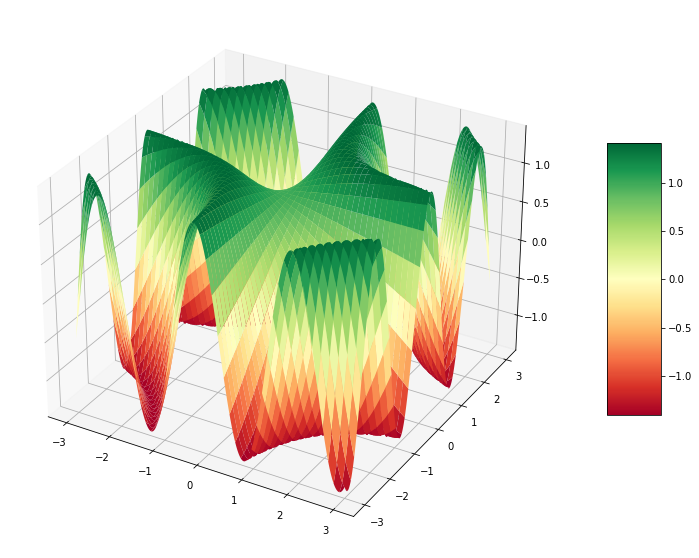

In [7]:
fig, ax = plt.subplots(subplot_kw = {"projection":'3d'}, figsize = (20,10))


# Data for three-dimensional surface

X = np.arange(-3,3,0.001)
Y = np.arange(-3,3,0.001)
X, Y = np.meshgrid(X,Y)

XY = X*Y
Z = np.sin(XY) + np.cos(XY)

surf = ax.plot_surface(X, Y, Z, cmap = cm.RdYlGn)
fig.colorbar(surf, shrink = 0.5, aspect = 5)

# Q3
## Consider the function y = sin(x) + cos(x)
### (a) Plot the functinon for 0 <= x <= 2pi

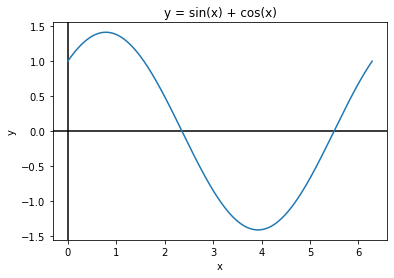

In [8]:
x = np.linspace(0,2*np.pi, 10000)
y = np.sin(x) + np.cos(x)

plt.title("y = sin(x) + cos(x)")
plt.xlabel("x");plt.ylabel("y")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x,y)

### (b) approximate the function with the first 2,3,4,5 and 6 terms of its Taylor series expansion about point x0 = 0 and plot them

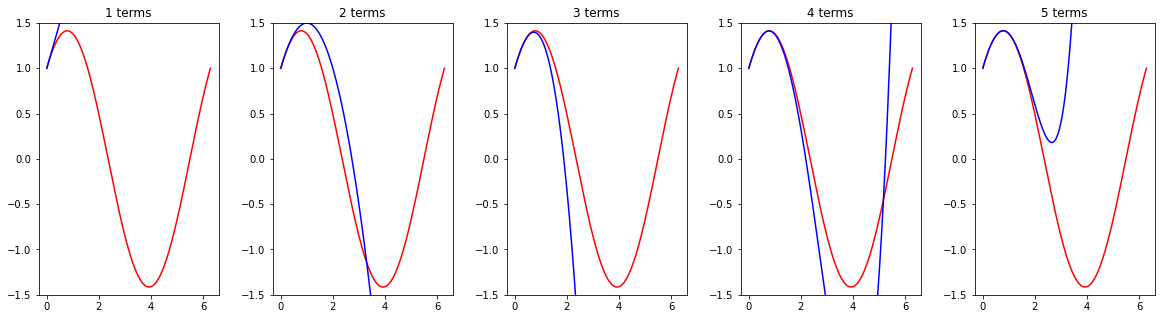

In [9]:

x = np.linspace(0,2*np.pi, 10000)
y = np.sin(x) + np.cos(x)

# set a function that returns the values of nth order of derivatives at x0 for iteration
def der():
    x = x0
    original = np.sin(x) + np.cos(x)
    first = np.cos(x) - np.sin(x)
    second = -np.sin(x) - np.cos(x)
    third = -np.cos(x) + np.sin(x)
    fourth = np.sin(x) + np.cos(x)
    fifth = np.cos(x) - np.sin(x)
    sixth = -np.sin(x) - np.cos(x)
    return original, first, second, third, fourth, fifth, sixth

# set x0 to 0
x0 = 0

# approximation using first derivative
y1 = der()[0]

# make a list for y to plot using iteration
y_list = [y1] # put f(x0) in the list

for i in range(5):
    y_list.append(y_list[i] + (x**(i+1))*der()[i+1]/factorial(i+1)) # append to the list of y
    
# y2 = y1 + x*der()[1]/factorial(1)
# y3 = y2 + x**2*der()[2]/factorial(2)
# y4 = y3 + x**3*der()[3]/factorial(3)
# y5 = y4 + x**4*der[4]/factorial(4)
# y6 = y5 + x**5*der[5]/factorial(5)

fig, ax = plt.subplots(1, 5, figsize = (20,5))

for i in range(5):
    ax[i].plot(x,y, c = 'red')
    ax[i].plot(x,y_list[i+1], c = 'blue')    
    
    ax[i].title.set_text(str(i+1) + " terms")
    ax[i].set_ylim(-1.5, 1.5)

fig.subplots_adjust(wspace=0.3, hspace=0.5)

### (c) use x0 = pi/4
* All I have to do is change x0 to pi/4 from the code above

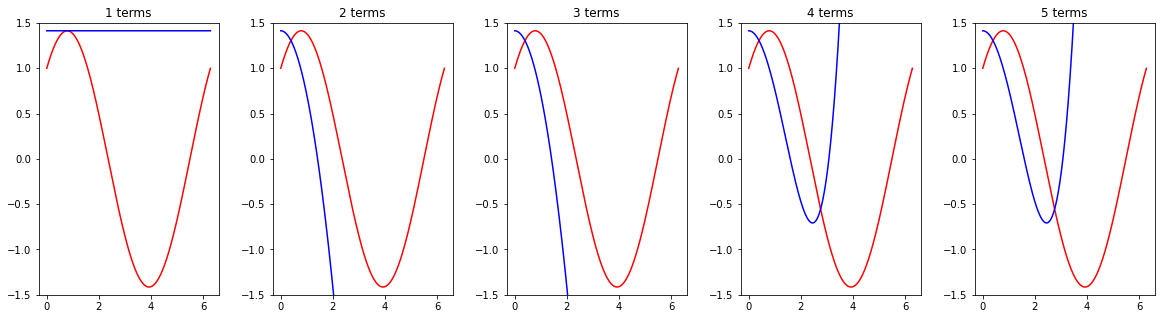

In [10]:
# set x0 to pi/4
x0 = np.pi/4

# approximation using first derivative
y1 = der()[0]

# make a list for y to plot using iteration
y_list = [y1] # put f(x0) in the list

for i in range(5):
    y_list.append(y_list[i] + (x**(i+1))*der()[i+1]/factorial(i+1)) # append to the list of y
    
# y2 = y1 + x*der()[1]/factorial(1)
# y3 = y2 + x**2*der()[2]/factorial(2)
# y4 = y3 + x**3*der()[3]/factorial(3)
# y5 = y4 + x**4*der[4]/factorial(4)
# y6 = y5 + x**5*der[5]/factorial(5)


fig, ax = plt.subplots(1, 5, figsize = (20,5))

for i in range(5):
    ax[i].plot(x,y, c = 'red')
    ax[i].plot(x,y_list[i+1], c = 'blue')    
    
    ax[i].title.set_text(str(i+1) + " terms")
    ax[i].set_ylim(-1.5, 1.5)

fig.subplots_adjust(wspace=0.3, hspace=0.5)

# Q4
## Consider the nonlinear function f(x) = x^3 [cos(x)]
### (a) plot y in range -6pi ~ 6pi. mark all the locations of x where y = 0.
- mathematically, the function should be zero in (2n-1) * pi/2, -(2n-1) * pi/2, 0 (n is natural number)

In [7]:
x = np.linspace(-6*np.pi, 6*np.pi, 10000)
y = (x**3)*np.cos(x)

# make a list of x in which y = 0
zero_x = [0]
for i in range(1,7):
    zero_x.append((2*i - 1) * np.pi/2)
    zero_x.append((2*i - 1) * np.pi/2 * (-1))
    
zero_x.sort()

# Draw the function
plt.figure(figsize = (20,5))
plt.plot(x,y)
plt.title("y = x^3 * cos(x)")
plt.xlabel("x");plt.ylabel("y")
plt.axhline(0, color='black', linewidth = '0.2')
plt.axvline(0, color='black', linewidth = '0.2')

plt.scatter(zero_x, list(np.zeros(len(zero_x))), c = 'r')
print("point in which y = 0 : {}".format(zero_x))

## (b) use fsolve to get all the roots

In [8]:

# To define the guessed points used for fsolved, make a list of points where the sign of function changed.
x_guess_draft = [-6*np.pi]
for i in range(len(y)):
    if y[i]<0 and y[i+1]>=0:
        x_guess_draft.append((x[i]+x[i+1])/2) 
x_guess_draft.append(6*np.pi)

# To make sure not to miss any points, add bisects
x_guess = []
for i in range(len(x_guess_draft)-1):
    x_guess.append(x_guess_draft[i])
    x_guess.append((x_guess_draft[i]+x_guess_draft[i+1])/2)
x_guess.append(6*np.pi)
    
print("value of x worth guessing for fsolve:", x_guess)

# define the function for fsolve
def oneEquation(z): 
    x = z[0]
    F = np.empty((1))
    F[0] = (x**3)*np.cos(x)
    return F

# make list to get the answers
answers = []
# solve for all x_guess and put them all in list 'answers'
for i in range(len(x_guess)):
    zGuess = np.array([x_guess[i]])
    z = fsolve(oneEquation, zGuess)
    answers.append(z[0].round(5)) # give round as the values are from numerical methods

# to remove repeated values, make it to set then back to list, then sort to make it in order
answers = set(answers); answers = list(answers); answers.sort()

print('='*40)
print("x where y = 0 (Using Newton-Raphson)\n", answers)
print("x where y = 0 (Exact Solution)\n", list(np.array(zero_x).round(5)))
print(":: They are the same")

# Draw the function
plt.figure(figsize = (20,5))
plt.plot(x,y)
plt.title("y = x^3 * cos(x)")
plt.xlabel("x");plt.ylabel("y")
plt.axhline(0, color='black', linewidth = '0.2')
plt.axvline(0, color='black', linewidth = '0.2')

# Draw Points in which y = 0
plt.scatter(answers, list(np.zeros(len(answers))), color = "r")

# Q5
## Find the solutions of the following system of nonlinear equations
- y = -2x - 4
- y = x^2 - 4

In [13]:
def twoEquation(z):
    x = z[0]; y= z[1]
    F = np.empty((2))
    F[0] = -2*x - 4
    F[1] = y**2 - 4
    return F

guess = np.linspace(-10, 10, 10)

answer1 = [];answer2 = []
for i in range(len(guess)):
    zGuess = np.array([guess[i], guess[i]])
    z = fsolve(twoEquation, zGuess)
    answer1.append(z[0].round(5)) # give round as the values are from numerical methods
    answer2.append(z[1].round(5))

answer1 = set(answer1); answer1 = list(answer1)
answer2 = set(answer2); answer2 = list(answer2)
print(answer1, answer2)

print("solution for y = -2x -4 : ", answer1)
print("solution for y = x^2 - 4 : ", answer2)

# Simple code to get the common roots from two equations.
system_answer = []
for i in range(len(answer1)):
    for j in range(len(answer2)):
        if answer2[j] == answer1[i]:
            system_answer.append(answer2[j])
print("solution for system of nonlinear equations : ", system_answer)


[-2.0] [2.0, -2.0]
solution for y = -2x -4 :  [-2.0]
solution for y = x^2 - 4 :  [2.0, -2.0]
solution for system of nonlinear equations :  [-2.0]


# Q6
### Determine the dimensions of a cylindrical can, V = 1.5 L with minimum surface area.
- find this minimum value then show it is minimum, not maximum.

In [14]:
r = np.linspace(0,0.1,100)

# Function that returns surface area
def Surface(z): 
    r = z[0]
    h = 0.0015 / ((np.pi)*r**2) # h from the relationship between r and h from volume : ((np.pi)*r**2)*h = 0.0015
    F = np.empty((1)) 
    F[0] = 2*((np.pi)*r**2) + 2*np.pi*r*h
    return F

answer_dic = {}
for i in range(len(r)):
    z = opt.minimize(Surface, np.array([r[i]]))
    answer = z['x'].round(5)[0]
    answer_dic[answer] = (0.0015 / ((np.pi)*answer**2))

# Check again with volume if the r,h value from optimize is correct & get the set with minimum surface area
couples = list(answer_dic.items())
minimum_area = 10000
rh_value = list([0,0])
for i in range(len(couples)):
    r = couples[i][0];h=couples[i][1]
    if (((np.pi)*r**2)*h) == 0.0015:
        area = (2*((np.pi)*r**2) + 2*np.pi*r*h)
        if area < minimum_area:
            minimum_area = area
            rh_value[0] = r; rh_value[1] = h
print("Minimum Area : {}, Corresponding r = {}, h = {}". format(minimum_area, rh_value[0], rh_value[1]))

# Show that this is minimum

# possible area from r
r = np.linspace(0,0.1,100)
h = 0.0015 / ((np.pi)*r**2)

for i in range(len(r)):
    if 2*((np.pi)*r[i]**2) + 2*np.pi*r[i]*h[i] < minimum_area:
        print("There is a smaller area in possible combinatons of r, h !!")
        # if there is smaller, this print line will be printed

Minimum Area : 0.07253963839274764, Corresponding r = 0.06204, h = 0.12405029691012924


In [15]:
# Additionally, check that the minimum value is not maximum

r = np.linspace(0,0.1,100)

def Surface(z): 
    r = z[0]
    h = 0.0015 / ((np.pi)*r**2) # h from the relationship between r and h from volume : ((np.pi)*r**2)*h = 0.0015
    F = np.empty((1)) 
    F[0] = -1 * (2*((np.pi)*r**2) + 2*np.pi*r*h)
    return F

answer_dic = {}
for i in range(len(r)):
    z = opt.minimize(Surface, np.array([r[i]]))
    answer = z['x'][0]
    if answer < 0:
        answer_dic[-1 * answer] = (0.0015 / ((np.pi)*answer**2))

# Check again with volume if the r,h value from optimize is correct & get the set with minimum surface area
couples = list(answer_dic.items())
maximum_area = 0
rh_value = list([0,0])
for i in range(len(couples)):
    r = couples[i][0];h=couples[i][1]
    if (((np.pi)*r**2)*h) == 0.0015:
        area = (2*((np.pi)*r**2) + 2*np.pi*r*h)
        if area > maximum_area:
            maximum_area = area
            rh_value[0] = r; rh_value[1] = h
print("Maximum Area : {}, Corresponding r = {}, h = {}". format(minimum_area, rh_value[0], rh_value[1]))


Maximum Area : 0.07253963839274764, Corresponding r = 233138186.73308095, h = 8.784449644347707e-21


- So, the area I initially got (minimum area) was not maximum area
- One thing more, if I try to get a maximum area, the shape becomes more of a plate than cylinder (height is almost 0)

# Q7
## Folding Cardboard 

- a + 2h = 14
- b + 2h = 10
- a * b * h = volume. Maximize volume

Here, we can see that a = 14 - 2h , b = 10 - 2h.  
So, Volume = (14-2h) x (10-2h) x h

In [16]:
# Function that returns -1 * volume (to use minimize to maximize)
def Volume(h): 
    F = -1 * (14 - 2*h) * (10 - 2*h) * h
    return F

h = np.linspace(0,5,50)

answer_dic = {}

for i in range(len(h)):
    maximum_h = opt.minimize(Volume, h[i])['x'][0].round(5) # give round as the values are from numerical methods
    if maximum_h > 0:
        answer_dic[maximum_h] = -1 * Volume(maximum_h)
print("Is there only one couple of height and volume :", len(answer_dic)==1)

# As there is only one couple, just using index 0 to make it single value
h_value = list(answer_dic.keys())[0]
maximum_volume = list(answer_dic.values())[0]

print("Maximum Volume : {}, Corresponding Height : {}, Edge1(a) : {}, Edge2(b) : {}".\
      format(maximum_volume, h_value, 14 - 2*h_value, 10 - 2*h_value))

Is there only one couple of height and volume : True
Maximum Volume : 120.16442131442615, Corresponding Height : 1.91833, Edge1(a) : 10.16334, Edge2(b) : 6.16334


- Show that the answer I got is maximum using plot

It is the Maximum. Not Minimum


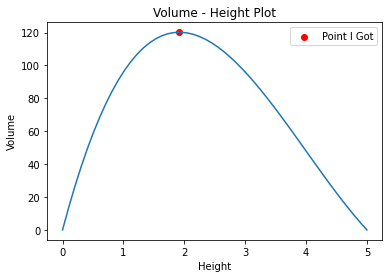

In [17]:
# Plot the volume-height plot
h = np.linspace(0,5,50)
F = (14 - 2*h) * (10 - 2*h) * h
plt.plot(h,F)
plt.title("Volume - Height Plot")
plt.xlabel('Height');plt.ylabel("Volume")
plt.scatter(h_value, maximum_volume, c = 'r', label = 'Point I Got')
plt.legend()

print("It is the Maximum. Not Minimum")

# Q8
## Given cuboid of volume 1000cm^3, find the a,b,c in which surface area is minimum
- a*b*c = 1000
- Area = 2ab + 2ac + 2bc <- Make this minimum

Using abc = 1000, we can substitute ab with 1000/c, ac with 1000/b.  
Area = 2ab + 2ac + 2bc (three variables) can be Area = 2000/c + 2000/b + 2bc (two variables)

In [18]:
# Define a function that returns the surface area of cuboid
def Area(z):
    b = z[0]; c = z[1]
    F = 2000/b + 2000/c + 2*b*c
    return F

# make two linspace, to make guess sets of b, c to feed opt.minimize
b, c = np.linspace(0,1000,100), np.linspace(0,1000,100)
# define a dictionary to hold the output answers
answer_dic = {}

for i in range(1,len(b)):
    for j in range(1,len(c)): # using two for, make the guess sets that covers all values of b and c
        guess = np.array([b[i], c[j]])
        minimum_set = opt.minimize(Area, guess)['x'].round(5) # give round as the values are from numerical methods
        minimum_area = Area(minimum_set)
        if minimum_area > 0: # remove sets in which the area is below 0
            answer_dic[minimum_area] = tuple(minimum_set)

In [19]:
print("All Answers Possible :", answer_dic)
minimum_index = list(answer_dic.keys()).index(min(list(answer_dic.keys())))
item = list(answer_dic.items())
minimum_item = item[minimum_index]
minimum_area = minimum_item[0]
b = minimum_item[1][0]; c = minimum_item[1][1]; a = 1000/(b*c)
print("="*40)
print("Answer that Makes Minimum Surface Area")
print("Area = {}cm^2, a = {}cm, b = {}cm, c = {}cm".format(minimum_area, a, b, c))

All Answers Possible : {600.0: (10.0, 10.0), 1134.7556807193814: (69.89677, 5.11644), 1234.206624028091: (80.10743, 5.09985), 880.0748605772792: (26.92525, 11.82196), 1567.9197716854685: (149.17455, 2.89409), 799.0107681951145: (22.29882, 3.6634), 1509.2789689912602: (135.85419, 2.29941), 217289.9924589245: (527.26296, 206.04187), 221386.7855745402: (537.9057, 205.77338)}
Answer that Makes Minimum Surface Area
Area = 600.0cm^2, a = 10.0cm, b = 10.0cm, c = 10.0cm


- The a,b,c value that makes minimum surface area is when a = b = c
- Mathematically, minimum value of x + y + z is when x = y = z (Inequality of arithmetic and geometric means)
- The answer from code is inline with the theory.